# **Ciencia de datos aplicada**
## **Taller No. 1**

## **Objetivo**
Evaluar las capacidades del estudiante para realizar análisis de datos utilizando técnicas estadísticas y de visualización que permitan entender un conjunto de datos, descubrir insights y plantear hipótesis de negocio.

### **Importando las librerias requeridas para el desarrollo del laboratorio**

In [3]:
# Importando las librerías
import pandas as pd
import numpy as np
import sys
import csv
import re

# Perfilamiento de datos
from pandas_profiling import ProfileReport

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### **Punto 1. Descripción de los datos**

Describa el conjunto de datos, tipos de variables y destaque cualquier problema de calidad
de datos y procesos de limpieza que deba implementar.

#### Lectura de los datos
El conjunto de datos tiene carácteres de doble comilla que dificulta la lectura de los mismos, puesto que las dobles commilas se usan para indicar que adentro hay varios "objetos" separados por coma, por lo que no los deberíamos tener en cuenta al momento de interpretar el archivo CSV (archivo separado por comas).
Debido a lo anterior, se definió una lógica que permita reconocer las frases o palabras contenidas entre las dobles comillas y remover las posibles comas que se encuentren dentro de ellas. Asimismo, teniendo en cuenta que tras realizar esta limpieza las dobles comillas no generan valor, se decide remover cada dobles comillas usadas para especificar lo anteriormente descrito.

Se definieron dos funciones para el procesamiento:
* find_quotes: encuentra todas las dobles comillas ("") en cada una de las líneas del texto usando una expresión regular.
* remove_commas: remueve todas las posibles comas que es encuentran dentro de las comillas. Hace uso de los índices para verificar sub-strings y remover la información deseada.

In [4]:
def find_quotes(line):
    positions = [m.start() for m in re.finditer('""', line)]
    return positions

def remove_commas(line, positions):
    clean_line = line
    length = len(positions)

    for i in range (0, length, 2):
        
        # Character used to replace the wrong ones
        if (i + 2 < length):
            replace_char = ' '
        else:
            replace_char = '|'

        # Indexes to get a sub-string
        start = positions[i]
        end = positions[i + 1]

        # Cleaning the sub-string
        to_clean = line[start:end + 2]
        cleaning = to_clean.replace(', ', replace_char)
        cleaning = cleaning.replace('"', '')
        clean_line = clean_line.replace(to_clean, cleaning)

    clean_line = clean_line + '\n'
    return clean_line

Teniendo en cuenta la limpieza realizada a los datos, se crea un nuevo archivo del conjunto de datos con toda la información limpia.

La lógica consiste en examinar los registros que empiezan y terminan con comillas, puesto que esto indica que el registro puede contener varias comillas.

In [5]:
with open("data/Data_Taller_1.csv", "r", encoding='utf8') as textfile:
    with open("data/Data_Taller_1_clean.csv", "w", encoding='utf8') as new_csv:
        for line in textfile:
            # Si la línea empieza con comillas y termina con triple comilla
            # Este caso se da cuando se tienen varias comillas en el texto
            if (line[0] == '"' and line[-3] == '"'):
                # No se agraga el car{acter de punto y coma para limpiar los datos
                new_line = line[1:-3]
                positions = find_quotes(new_line)
                clean_line = remove_commas(new_line, positions)
                new_csv.write(clean_line)
                #print(new_line)
                #print(clean_line)
            elif (line[-2:-1] == ';'):
                #print(line[:-2])
                #print(line[-2:-1])
                #print(line[-1:])
                # Se remueve el carácter de punto y coma del final de la línea
                clean_line = line[:-2] + '\n'
                new_csv.write(clean_line)
            else:
                new_csv.write(line)

        new_csv.close()
    textfile.close()

Adicionalmente, se encontro un problema de lectura con la fila 1977, que se debe a la estructura del nombre del artista, ya que su nombre tiene una coma:
* Nombre del artista: Tyler, The Creator
* Canción: EARFQUAKE

La coma en el nombre es un inconveniente dado que la estructura del conjunto de datos usa las comas para separar cada campo enla fila correspondiente a una columna. De esta forma, la coma adicional indicaría que existen 19 columnas en lugar de 18 (todos los regitros deben tener 18 columnas).

In [6]:
# Removiendo la coma mal ubicada de acuerdo al análisis realizado
complete_info = ''

with open("data/Data_Taller_1_clean.csv", "r", encoding='utf8') as textfile:
    for line in textfile:
        if line.find('Tyler, The Creator,EARFQUAKE') != -1:
            new_line = line.replace('Tyler, The Creator,EARFQUAKE', 'Tyler The Creator,EARFQUAKE')
        else:
            new_line = line
        
        complete_info = complete_info + new_line

with open("data/Data_Taller_1_clean.csv", "w", encoding='utf8') as new_csv:
    new_csv.write(complete_info)


In [7]:
# Lectura de datos del archivo CSV
data = pd.read_csv('data/Data_Taller_1_clean.csv', sep=',', header=0, on_bad_lines='warn', nrows=2000)

In [8]:
# Visualizando los primeros datos
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,False,1999,79.0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,rock|pop
2,Faith Hill,Breathe,250546.0,False,1999,66.0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,pop|country
3,Bon Jovi,It's My Life,224493.0,False,2000,78.0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,rock|metal
4,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [9]:
data.describe

<bound method NDFrame.describe of               artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again     211160.0   
1          blink-182                    All The Small Things     167066.0   
2         Faith Hill                                 Breathe     250546.0   
3           Bon Jovi                            It's My Life     224493.0   
4             *NSYNC                             Bye Bye Bye     200560.0   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker     181026.0   
1996    Taylor Swift                            Cruel Summer     178426.0   
1997    Blanco Brown                              The Git Up     200593.0   
1998       Sam Smith  Dancing With A Stranger (with Normani)     171029.0   
1999     Post Malone                                 Circles     215280.0   

     explicit  year  popularity  danceabi

In [76]:
data.dtypes

artist               object
song                 object
duration_ms         float64
explicit             object
year                  int64
popularity          float64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

Viendo los valires nulos en el conjunto de datos:

In [10]:
data.isnull().sum()

artist              0
song                0
duration_ms         2
explicit            1
year                0
popularity          3
danceability        3
energy              0
key                 0
loudness            1
mode                0
speechiness         1
acousticness        3
instrumentalness    1
liveness            0
valence             1
tempo               2
genre               1
dtype: int64

Como medida importante, sabemos que hay nulos en estos datos, lo más recomendable es preguntar al negocio como tratar estos datos. Para este caso, se decide imputar un valor de acuerdo al promedio de los datos por cada columna para aquellos campos que tienen un valor nulo y cuyos datos son solamente numéricos.

In [11]:
data['duration_ms'] = data['duration_ms'].fillna(round(data['duration_ms'].mean()))
data['popularity'] = data['popularity'].fillna(round(data['popularity'].mean()))
data['danceability'] = data['danceability'].fillna(round(data['danceability'].mean()))
data['loudness'] = data['loudness'].fillna(round(data['loudness'].mean()))
data['speechiness'] = data['speechiness'].fillna(round(data['speechiness'].mean()))
data['acousticness'] = data['acousticness'].fillna(round(data['acousticness'].mean()))
data['instrumentalness'] = data['instrumentalness'].fillna(round(data['instrumentalness'].mean()))
data['valence'] = data['valence'].fillna(round(data['valence'].mean()))
data['tempo'] = data['tempo'].fillna(round(data['tempo'].mean()))

Se decide remover el registro completo de los datos para aquellas columnas no numéricas con valores nulos:
En este caso, para las columnas: explicit y genre.

In [12]:
data.isna().sum()

artist              0
song                0
duration_ms         0
explicit            1
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               1
dtype: int64

In [13]:
data.dropna(inplace=True)
data.shape

(1998, 18)

Finalmente eliminamos los registros duplicados

In [14]:
data.duplicated().sum()

59

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
data.shape

(1939, 18)

#### **Entendimiento de los Datos**

Primero vamos a obtener una vista rápida de los datos, para eso utilizaremos la herramienta PandasProfiling.

In [65]:
ProfileReport(data, minimal=True)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]


Teniendo en cuenta que en la casilla de género existen diferentes valores válidos, es de nuestro interés encontrar los valores únicos:

In [17]:
genres_list = []

for (index, columnData) in data['genre'].iteritems():
    #print(columnData)
    genres = columnData.split('|')
    for element in genres:
        genres_list.append(element)

unique_genres = list(set(genres_list))
unique_genres

['Folk/Acoustic',
 'latin',
 'metal',
 'set()',
 'hip hop',
 'blues',
 'country',
 'Dance/Electronic',
 'easy listening',
 'World/Traditional',
 'classical',
 'jazz',
 'R&B',
 'rock',
 'pop']

Se observa que hay un género que no corresponde: "set()". Al ser un valor inválido de género a simple vista, puede ser una pregunta de negocio que se puede realizar a los interesados para entender mejor los datos.

Viendo la correlación de los datos:

<AxesSubplot:>

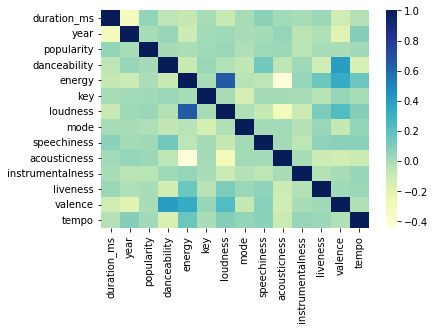

In [69]:
sns.heatmap(data.corr(),cmap='YlGnBu')

Se puede observar que hay algunas columnas correlacionadas entre si, como por ejemplo: 
* valence con danceability
* loudness con energy
* energy con acousticness
entre otras.

Lo ideal es remover columnas algunas de las columnas correlacionadas, ya que no aportan información a un modelo. Sin embargo, dado que el taller está enfocado al analísis de los datos, se mantendrán estas columnas.

### **Punto 1: Diferencia géneros en relación con su duración**

¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

Se define actividad de los artistas como aquellos que presentan mayor número de apariciones a través de los años. De esta forma se realizará un conteo de las apariciones de los artistas durante los últimos 10 años para definir cuales de ellos están en el Top 10.

Acotando nuestro conjunto de datos de acuerdo a la condición de los últimos 10 años. Se asume como año actual el 2022 y se toman 10 años hacía atrás a partir de este.

In [54]:
data[data['year']>= 2012][['artist','year']]

,artist,year
29,Chicane,2016
46,Samantha Mumba,2018
115,Faithless,2015
154,Usher,2016
175,DB Boulevard,2018
...,...,...
1995,Jonas Brothers,2019
1996,Taylor Swift,2019
1997,Blanco Brown,2019
1998,Sam Smith,2019


Realizando el conteo de las aparciones a través de los últimos años de los artistas

In [72]:
artists_last_10_years = data[data['year']>= 2012][['artist','year']]
top_artists = artists_last_10_years.groupby(by=['artist']).count()
top_artists.reset_index(inplace=True)
top_artists.rename(columns={'year': 'count'}, inplace=True)
top_artists


,artist,count
0,2 Chainz,2
1,21 Savage,2
2,3 Doors Down,1
3,5 Seconds of Summer,3
4,6ix9ine,2
...,...,...
390,fun.,1
391,girl in red,1
392,iann dior,2
393,t.A.T.u.,1


Ordenando el conteo realizado y tomando únicamente los 10 artistas con mayor número de apariciones

In [75]:
top_artists.sort_values(by=['count'], ascending=False, inplace=True)
top_10_artists = top_artists[:10]
top_10_artists.reset_index(inplace=True)
top_10_artists.drop(columns='index')

,artist,count
0,Calvin Harris,18
1,Drake,16
2,Ariana Grande,13
3,David Guetta,13
4,Taylor Swift,13
5,Katy Perry,11
6,Avicii,9
7,Maroon 5,9
8,Ed Sheeran,9
9,One Direction,9


### **Punto 2: Diferencia géneros en relación con su duración**

¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con
su duración? Halle la diferencia del tiempo promedio de ambos géneros.

In [70]:
# Para el género Folk/Acoustic
folcAc_data = data[data['genre'].str.contains('Folk/Acoustic')==True][['artist','song','duration_ms','genre']]
folcAc_data['duration_ms'] = folcAc_data['duration_ms'].div(1000).round(2)
folcAc_data.rename(columns = {'duration_ms':'duration_s'}, inplace = True)
folcAc_data

,artist,song,duration_s,genre
21,Tom Jones,Sexbomb,211.89,rock|Folk/Acoustic|easy listening
59,Oasis,Go Let It Out,278.67,Folk/Acoustic|rock
93,The Corrs,Breathless,207.51,pop|Folk/Acoustic
167,Enya,Only Time,218.55,World/Traditional|Folk/Acoustic
203,Vanessa Carlton,A Thousand Miles,237.49,Folk/Acoustic|pop
285,Alanis Morissette,Hands Clean,269.40,pop|Folk/Acoustic
293,Michelle Branch,All You Wanted,217.68,pop|Folk/Acoustic
339,Simply Red,Sunrise,199.04,rock|R&B|Folk/Acoustic|pop
544,Rob Thomas,Lonely No More,226.64,pop|Folk/Acoustic
557,Natalie Imbruglia,Shiver,222.65,pop|Folk/Acoustic


In [71]:
# Calculando la duración promedio para el género "Folk/Acoustic"
folcAc_mean = folcAc_data['duration_s'].mean().round(2)
folcAc_mean

220.18

In [72]:
# Para el género Latin
latin_data = data[data['genre'].str.contains('latin')==True][['artist','song','duration_ms','genre']]
latin_data['duration_ms'] = latin_data['duration_ms'].div(1000).round(2)
latin_data.rename(columns = {'duration_ms':'duration_s'}, inplace = True)
latin_data

,artist,song,duration_s,genre
40,Enrique Iglesias,Be With You,219.36,pop|latin
51,Ricky Martin,She Bangs - English Version,280.63,pop|latin
69,Santana,Maria Maria (feat. The Product G&B),261.97,rock|blues|latin
88,Marc Anthony,You Sang To Me,347.11,pop|latin
105,Nelly Furtado,I'm Like A Bird,243.16,hip hop|pop|latin
...,...,...,...,...
1960,Bad Bunny,Callaita,250.53,latin
1962,Pedro Capó,Calma - Remix,238.20,pop|latin
1964,Lunay,Soltera - Remix,266.09,pop|latin
1980,Anuel AA,Secreto,258.80,latin


In [73]:
# Calculando la duración promedio para el género "Latin"
latin_mean = latin_data['duration_s'].mean().round(2)
latin_mean

227.5

Encontrando la diferencia del promedio de ambos géneros:

In [250]:
diff = round(abs(folcAc_mean - latin_mean),2)
diff

7.32

La diferencia entre la duración promedio para los géneros de Folk/Acoustic y Latin es de 7,32 segundos aproximadamente. 

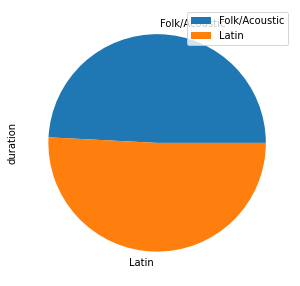

In [254]:
df = pd.DataFrame({'duration': [folcAc_mean, latin_mean]}, index=['Folk/Acoustic', 'Latin'])
plot = df.plot.pie(y='duration', figsize=(5, 5))

### **Punto 3: Canciones top para cada género**

Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la
cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

Teniendo en cuenta los géneros del conjunto de datos, se revisan las canciones por año y género para cada año, de esta forma podemos contar apariciones de canciones para un género y para cada año específico.

In [286]:
from collections import Counter, OrderedDict

# Funciòn para obtener los top 5 géneros por año
def top5_byYear(year):
    genres_dict = {}
    genres_list = []

    # Creando Dataframe de acuerdo al año específicado
    data_year = data[data['year'] == year][['artist','song','year','genre']]

    # Iterando cada fila del Dataframe con la información de canciones del año 2019
    for (index, columnData) in data_year['genre'].iteritems():
        genres = columnData.split('|')
        # Iterando cada elemento y agregándolo a la lista (habrán elementos repetidos)
        for element in genres:
            genres_list.append(element)

    # Creando un diccionario con el conteo de cada elemento
    genres_dict = Counter(genres_list)
    # Organizando el diccionario de acuerdo a los valores de cada "llave"
    genres_dict_sorted = OrderedDict(sorted(genres_dict.items(), key=lambda t: t[1]))
    # Imprimienlos el top 5 de géneros
    print("| Top 5 Genres - ", year, " |")
    for x in list(genres_dict_sorted)[-5:]:
        print ("Genre: {}, Count: {} ".format(x,  genres_dict_sorted[x]))

    return genres_dict_sorted
#sorted(genres_dict.values(), reverse=True)
#{k:genres_list.count(k) for k in set(genres_list)}


Top 5 de los géneros del 2019 según la cantidad de canciones

In [293]:
# Top 5 de los géneros del 2019 según la cantidad de canciones
Top_2019 = top5_byYear(2019)
data_Top_2019 = pd.DataFrame(Top_2019.items(), columns=['Genre', 'Count'])[-5:]
data_Top_2019

| Top 5 Genres -  2019  |
Genre: latin, Count: 8 
Genre: R&B, Count: 9 
Genre: Dance/Electronic, Count: 21 
Genre: hip hop, Count: 38 
Genre: pop, Count: 63 


,Genre,Count
4,latin,8
5,R&B,9
6,Dance/Electronic,21
7,hip hop,38
8,pop,63


Encontrando los Top 5 de los géneros para los años indicados: 2000, 2005, 2010, 2015, 2019

In [289]:
# Cantidad de canciones del Top de géneros en los años 2000, 2005, 2010, 2015, 2019
Top_2000 = top5_byYear(2000)
Top_2005 = top5_byYear(2005)
Top_2010 = top5_byYear(2010)
Top_2015 = top5_byYear(2015)

| Top 5 Genres -  2000  |
Genre: metal, Count: 7 
Genre: rock, Count: 12 
Genre: hip hop, Count: 20 
Genre: R&B, Count: 24 
Genre: pop, Count: 55 
| Top 5 Genres -  2005  |
Genre: metal, Count: 5 
Genre: rock, Count: 18 
Genre: R&B, Count: 30 
Genre: hip hop, Count: 50 
Genre: pop, Count: 78 
| Top 5 Genres -  2010  |
Genre: rock, Count: 6 
Genre: R&B, Count: 22 
Genre: Dance/Electronic, Count: 28 
Genre: hip hop, Count: 52 
Genre: pop, Count: 94 
| Top 5 Genres -  2015  |
Genre: rock, Count: 13 
Genre: R&B, Count: 19 
Genre: Dance/Electronic, Count: 28 
Genre: hip hop, Count: 29 
Genre: pop, Count: 83 


Creando dataframes con la información

In [294]:
data_Top_2000 = pd.DataFrame(Top_2000.items(), columns=['Genre', 'Count'])[-5:]
data_Top_2005 = pd.DataFrame(Top_2005.items(), columns=['Genre', 'Count'])[-5:]
data_Top_2010 = pd.DataFrame(Top_2010.items(), columns=['Genre', 'Count'])[-5:]
data_Top_2015 = pd.DataFrame(Top_2015.items(), columns=['Genre', 'Count'])[-5:]

Unificamos la información de los top de géneros por año en una sola tabla

In [313]:
total = pd.merge(data_Top_2000, data_Top_2005, how='outer', on='Genre')
total.rename(columns={'Count_x': 'Count_2000', 'Count_y': 'Count_2005'}, inplace=True)
total = pd.merge(total, data_Top_2010, how='outer', on='Genre')
total.rename(columns={'Count': 'Count_2010'}, inplace=True)
total = pd.merge(total, data_Top_2015, how='outer', on='Genre')
total.rename(columns={'Count': 'Count_2015'}, inplace=True)
total

,Genre,Count_2000,Count_2005,Count_2010,Count_2015
0,metal,7.0,5.0,NaN,NaN
1,rock,12.0,18.0,6.0,13.0
2,hip hop,20.0,50.0,52.0,29.0
3,R&B,24.0,30.0,22.0,19.0
4,pop,55.0,78.0,94.0,83.0
5,Dance/Electronic,NaN,NaN,28.0,28.0


Visualizando los top 5 por género de cada año propuesto:

<AxesSubplot:xlabel='Genre'>

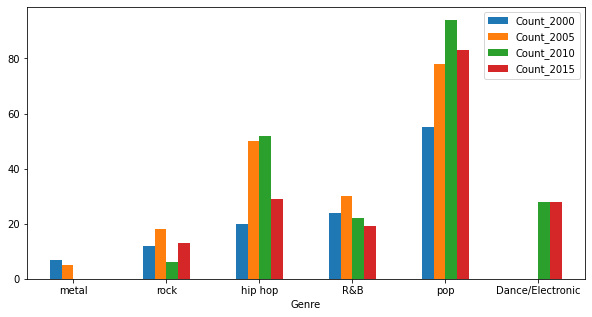

In [347]:
total.plot.bar(x='Genre', rot=0, figsize=(10,5))

<AxesSubplot:xlabel='Genre'>

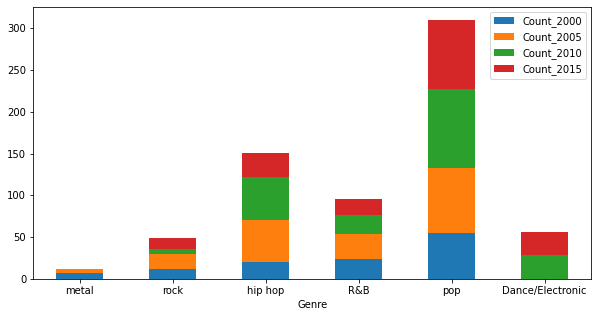

In [349]:
total.plot.bar(x='Genre', stacked=True, rot=0, figsize=(10,5))

### **Punto 4: Progresión de nuevos artistas**

¿Cómo ha sido la progresión de nuevos artistas? Asuma que un artista nuevo es aquel del
cual no se tiene registros pasados y solo es nuevo durante el primer año de aparición.

In [87]:
# Lista de los años presentes en el conjunto de datos
years_list = data['year'].unique()
print(years_list)
print("Cantidad de años: ", years_list.size)

[2000 1999 2001 2011 2002 2016 1998 2018 2004 2010 2015 2006 2008 2019
 2003 2013 2005 2012 2020 2007 2009 2017 2014]
Cantidad de años:  23


In [94]:
# ordenando los años
years_list_sorted = sorted(years_list)
print(years_list_sorted)

[1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Se define el año 1998 como inicial y se empezarán a considerar nuevos artistas a partir del año 1999. Se dice que un artista nuevo es aquel que no apareció en años anteriores.

In [169]:
data[data['year'] == years_list_sorted[0]][['artist','year','genre']]

,artist,year,genre
44,Missy Elliott,1998,hip hop|pop|R&B


El conjunto de datos tiene únicamente un registro para el año 1998, por lo que para el año 1999 todos los artistas serán nuevos (excepto por el artista presente en el año 1998)

In [200]:
# Creando un dataframe vacío que contendrá toda la información de los artistas nuevos por año
new_artists_collection = pd.DataFrame()

# Ciclo que itera todos los años en orden
# Empiza con el año actual en 1999, ya que antes de 1998 no existe información en el conjunto de datos
for i in range (1,len(years_list_sorted),1):
    # Para el año actual
    data_artists_current = pd.DataFrame()
    data_artists_current = data[data['year'] == years_list_sorted[i]][['artist','year','genre']]
    data_artists_current.drop_duplicates(inplace=True)

    # Para tener en cuenta los años previos
    # Se iteran todos los años anteriores al actual y se concatena toda la información
    # Esta info se usa para ver si uno de los artistas del año actual no se había visto en años anteriores
    data_artists_previous = pd.DataFrame()
    for j in range (0, i, 1):
        current_dataframe = data[data['year'] == years_list_sorted[j]][['artist','year','genre']]
        data_artists_previous = pd.concat([data_artists_previous, current_dataframe])
        data_artists_previous.drop_duplicates(inplace=True)

    # Comparando la información de los artistas de los años    
    new_artists = pd.merge(data_artists_previous, data_artists_current, how='right', on='artist', indicator='i').query('i == "right_only"').drop('i', axis=1)

    new_artists.drop(['genre_x', 'year_x', 'genre_y'], axis=1, inplace=True)
    new_artists.reset_index(drop=True)
    new_artists.rename(columns={'year_y': 'year'}, inplace=True)

    new_artists_collection = pd.concat([new_artists_collection, new_artists])


array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [325]:
new_artists_collection

,artist,year
0,blink-182,1999
1,Faith Hill,1999
2,Sisqo,1999
3,Destiny's Child,1999
4,Eiffel 65,1999
...,...,...
120,Joel Corry,2019
127,Blanco Brown,2019
0,t.A.T.u.,2020
1,Will Smith,2020


In [202]:
new_artists_collection.shape

(832, 2)

En total se encontraron 832 artistas nuevos para los 20 años analizados

In [338]:
n_artists_count = new_artists_collection.groupby('year').count()
n_artists_count.reset_index(inplace=True)
n_artists_count.rename(columns={'artist': 'new_artists_count'}, inplace=True)
n_artists_count

,year,new_artists_count
0,1999,30
1,2000,55
2,2001,60
3,2002,39
4,2003,42
5,2004,44
6,2005,40
7,2006,38
8,2007,37
9,2008,33


Visualizando los artistas nuevos detectados en cada año:

<AxesSubplot:title={'center':'Número de artistas nuevos por año'}, xlabel='year'>

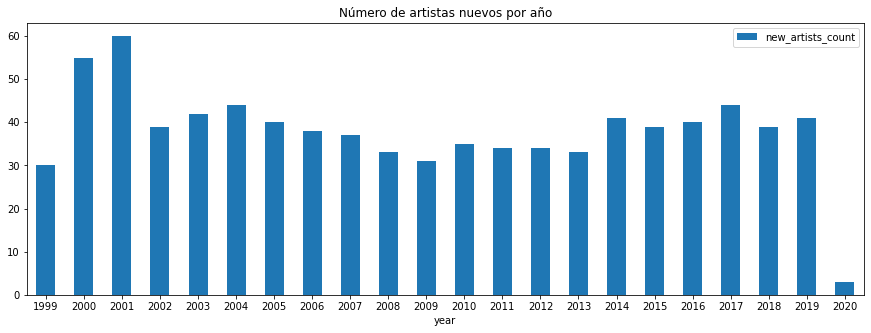

In [359]:
n_artists_count.plot.bar(x='year', rot=0, figsize=(15,5), title='Número de artistas nuevos por año')

### **Punto 5: Progresión de la popularidad promedio por género y por año**

Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre
la gráfica, ej: ¿existen tendencias?

In [210]:
genres_list = []

for (index, columnData) in data['genre'].iteritems():
    #print(columnData)
    genres = columnData.split('|')
    for element in genres:
        genres_list.append(element)

unique_genres = list(set(genres_list))
unique_genres


['metal',
 'country',
 'Dance/Electronic',
 'rock',
 'blues',
 'easy listening',
 'Folk/Acoustic',
 'jazz',
 'latin',
 'World/Traditional',
 'set()',
 'hip hop',
 'R&B',
 'classical',
 'pop']

Se considera la popularidad del género por año como el promedio total del valor de "popularity" de las canciones de un mismo género.

In [229]:
popularity_collection = pd.DataFrame()

for current in unique_genres:
    current_data = data[data['genre'].str.contains(current)][['popularity','year','genre']].copy()
    current_data['genre'] = current
    popularity_collection = pd.concat([popularity_collection, current_data])

popularity_collection

C:\Users\sword\AppData\Local\Temp/ipykernel_29076/281951939.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  current_data = data[data['genre'].str.contains(current)][['popularity','year','genre']].copy()


,popularity,year,genre
3,78.0,2000,metal
20,83.0,2000,metal
25,72.0,2000,metal
77,78.0,2000,metal
80,49.0,2000,metal
...,...,...,...
1992,71.0,2019,pop
1993,63.0,2019,pop
1995,79.0,2019,pop
1996,78.0,2019,pop


Agrupando los datos por género y año:

In [360]:
popularity_grouped = popularity_collection.groupby(by=['genre', 'year']).mean()
popularity_grouped.reset_index(inplace=True)
popularity_grouped

,genre,year,popularity
0,Dance/Electronic,1999,57.000000
1,Dance/Electronic,2000,53.000000
2,Dance/Electronic,2001,56.833333
3,Dance/Electronic,2002,54.666667
4,Dance/Electronic,2003,52.600000
...,...,...,...
195,set(),2013,74.000000
196,set(),2014,73.000000
197,set(),2016,57.000000
198,set(),2018,67.000000


Ahora se construirá un dataframe que contenga los géneros musicales en cada una de sus columnas, con un valor promedio de su popularidad por año:

In [387]:
popularity_plot = pd.DataFrame(columns={'year', 'popularity'})

for genre in popularity_grouped['genre'].unique():
    df = popularity_grouped[popularity_grouped['genre'] == genre][['year','popularity']]
    popularity_plot = pd.merge(popularity_plot, df, how='outer', on='year')
    try:
        popularity_plot.drop(columns={'popularity_x'}, inplace=True)
        popularity_plot.rename(columns={'popularity_y': genre}, inplace = True)
    except:
        popularity_plot.rename(columns={'popularity': genre}, inplace = True)

popularity_plot.drop(columns={'set()'}, inplace=True)
popularity_plot

,year,Dance/Electronic,Folk/Acoustic,R&B,World/Traditional,blues,classical,country,easy listening,hip hop,jazz,latin,metal,pop,rock
0,1999,57.000000,65.000000,64.000000,NaN,66.0,NaN,66.000000,65.0,69.857143,NaN,58.666667,68.000000,63.103448,69.250000
1,2000,53.000000,45.666667,55.208333,69.0,NaN,NaN,NaN,NaN,56.750000,NaN,20.666667,70.571429,56.945455,59.333333
2,2001,56.833333,60.000000,58.571429,NaN,NaN,NaN,62.000000,NaN,60.406250,NaN,64.666667,66.125000,58.177778,58.250000
3,2002,54.666667,66.000000,55.612903,NaN,NaN,NaN,NaN,60.0,59.909091,NaN,NaN,71.200000,60.528571,69.153846
4,2003,52.600000,NaN,59.437500,61.0,3.0,NaN,NaN,55.0,61.718750,55.0,55.000000,71.250000,58.356164,57.538462
5,2004,56.444444,NaN,61.566667,60.0,NaN,NaN,NaN,NaN,61.785714,NaN,40.500000,60.000000,56.861538,61.363636
6,2005,52.000000,60.750000,53.733333,67.5,NaN,NaN,68.333333,60.0,61.860000,60.0,52.666667,69.400000,59.923077,65.388889
7,2006,54.666667,NaN,62.607143,48.0,NaN,NaN,34.500000,NaN,60.111111,NaN,80.666667,65.000000,55.465753,67.857143
8,2007,52.375000,NaN,61.515152,NaN,56.5,NaN,NaN,NaN,58.763158,NaN,51.000000,74.800000,57.911765,64.789474
9,2008,60.333333,54.500000,58.228571,NaN,NaN,NaN,NaN,60.0,64.250000,NaN,52.000000,66.333333,62.721519,67.461538


Visualizando los datos del dataframe anterior para ver como ha variado la popularidad promedio de los géneros a través de los años:

<AxesSubplot:title={'center':'Popularidad promedio por género y por año'}, xlabel='year'>

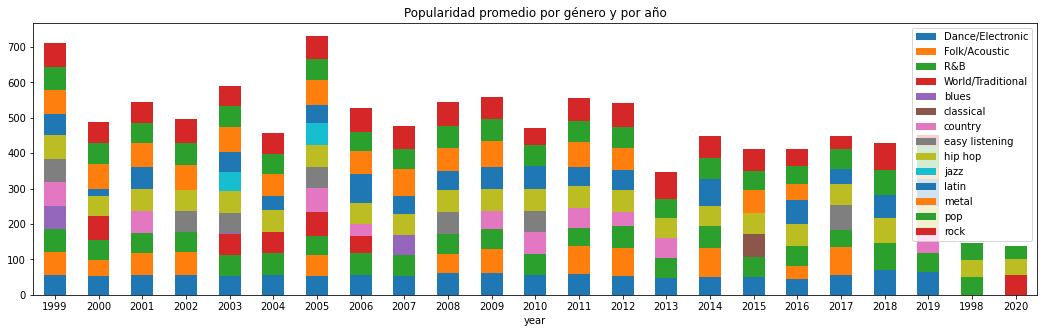

In [391]:
popularity_plot.plot.bar(x='year', stacked=True, rot=0, figsize=(18,5), title='Popularidad promedio por género y por año')

Finalmente, se grafica cada género para los años en que existe registro en nuestro conjunto de datos. De esta forma, podremos ver como han evolucionado a traves de los años.

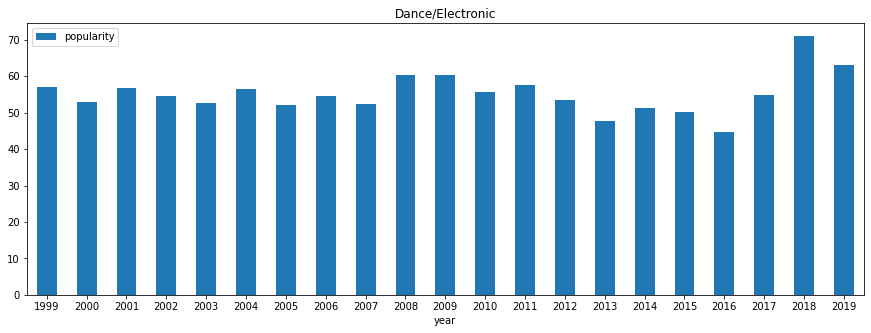

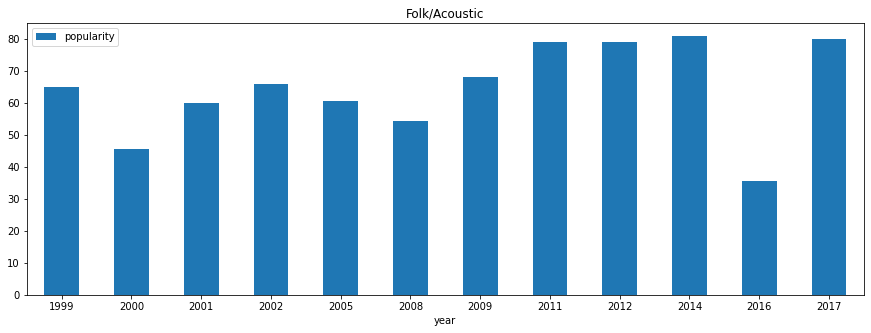

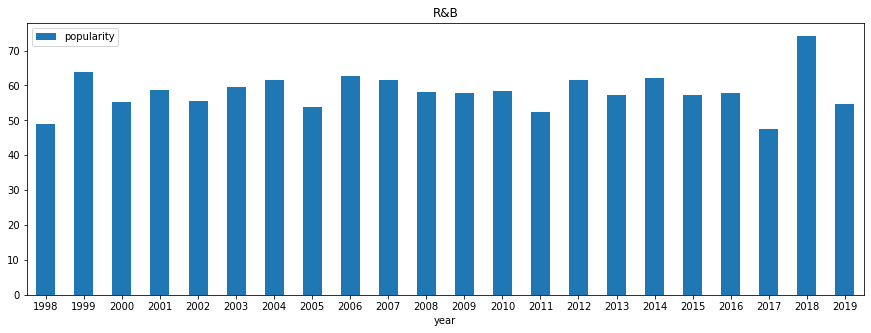

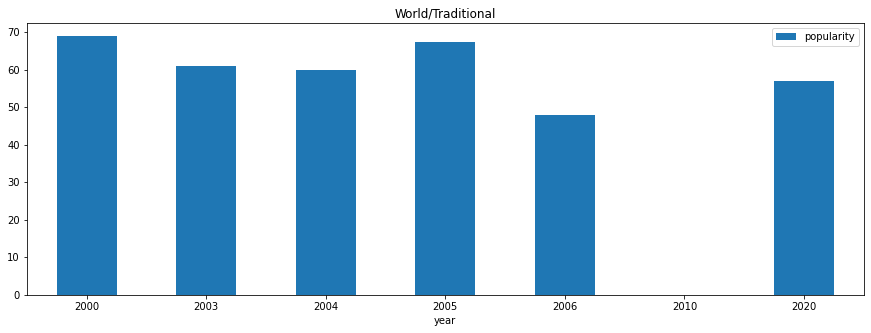

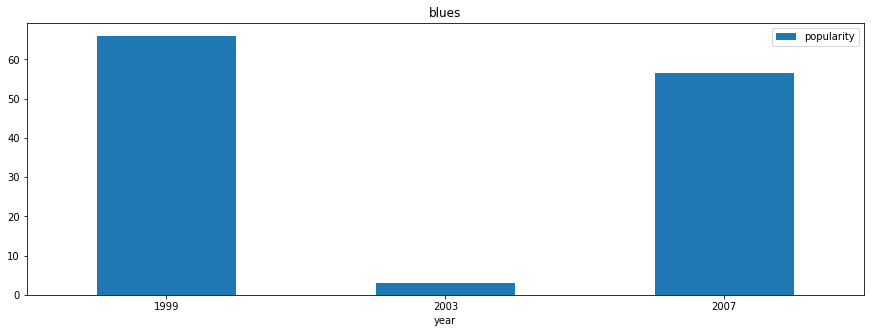

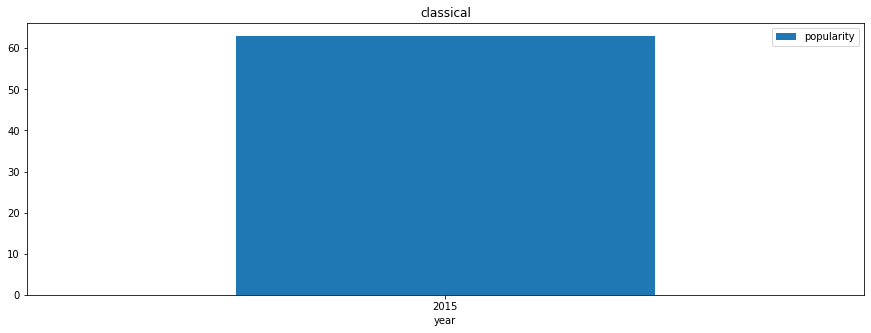

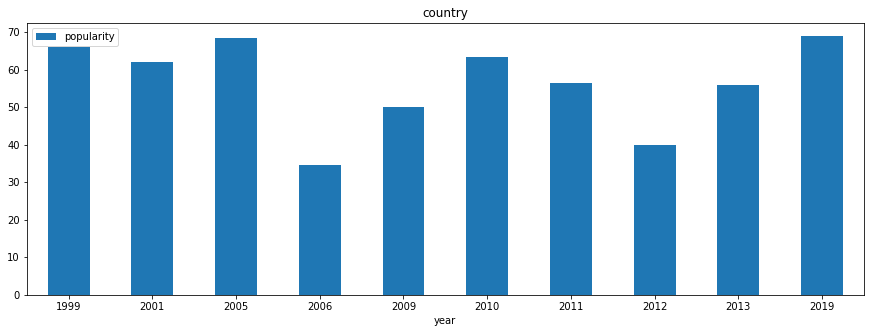

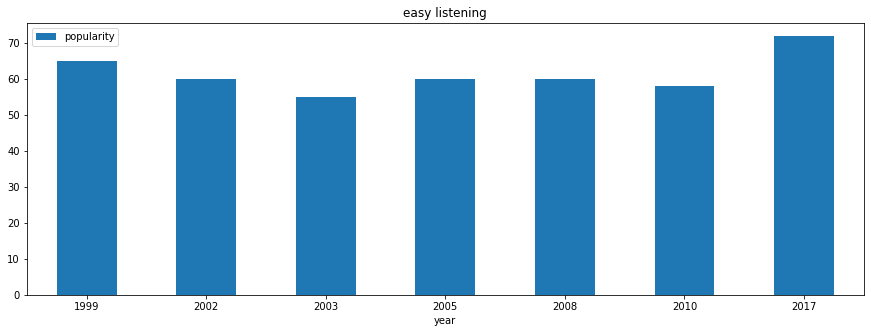

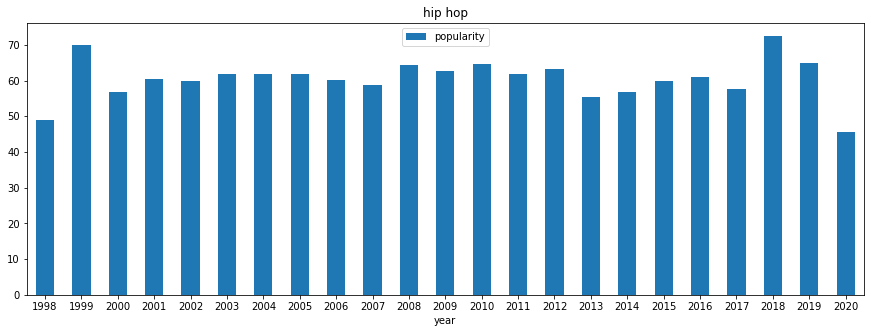

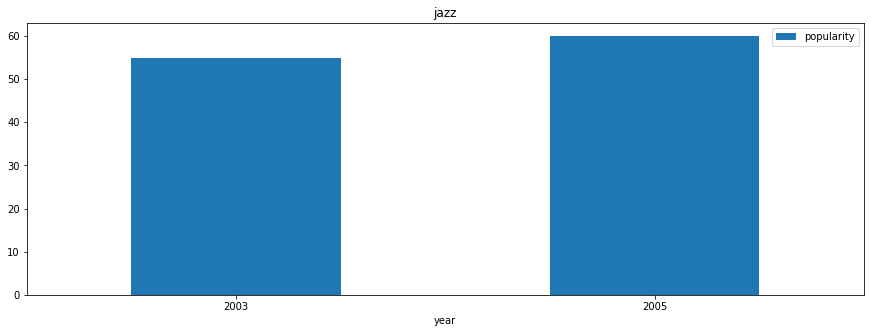

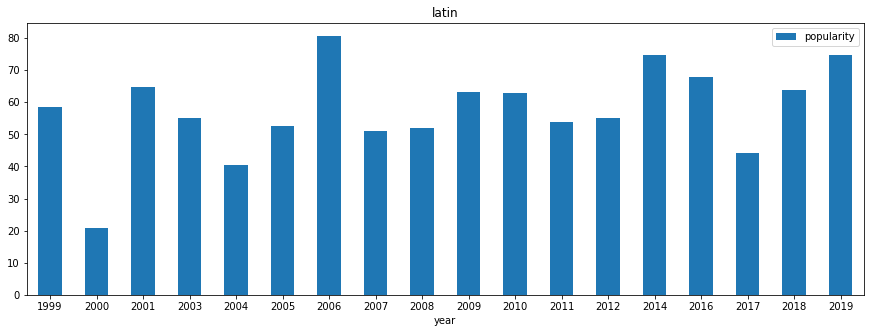

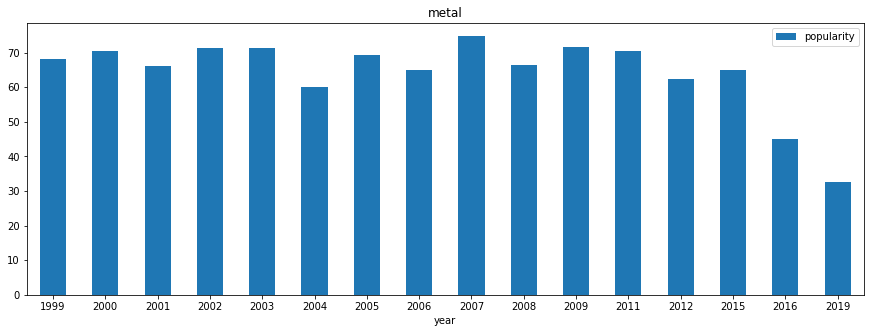

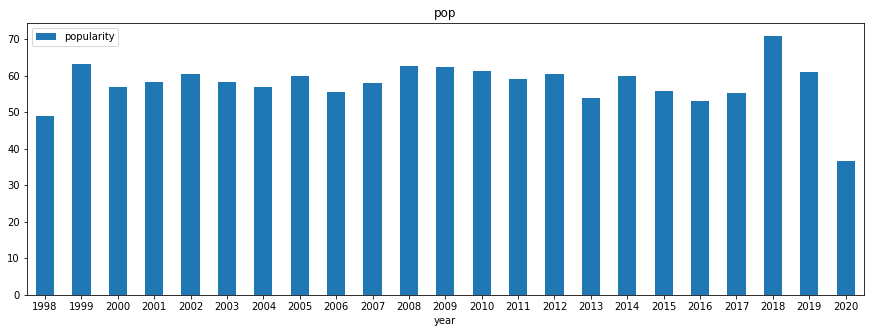

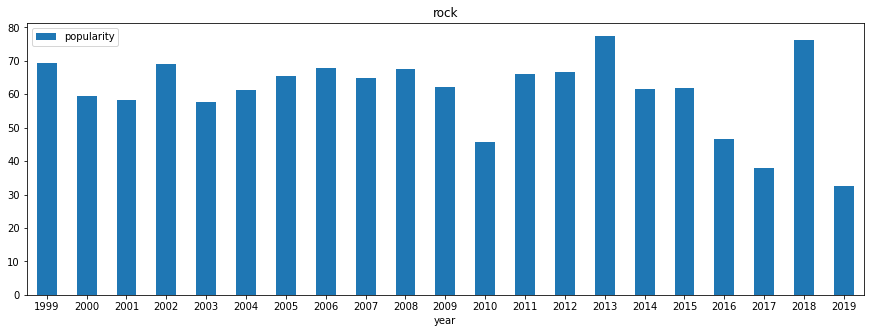

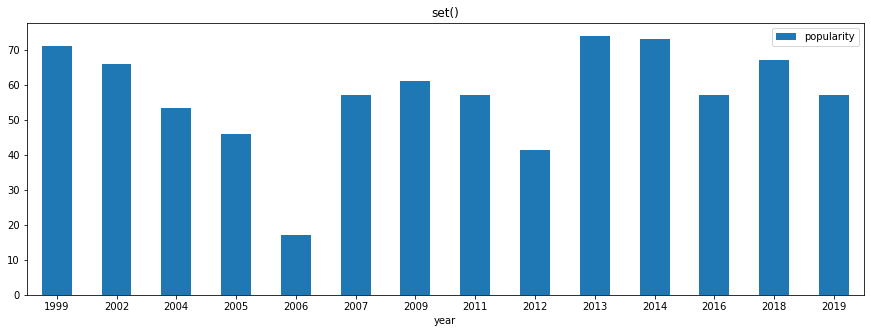

In [377]:
for genre in popularity_grouped['genre'].unique():
    df = popularity_grouped[popularity_grouped['genre'] == genre][['year','popularity']]
    df.plot.bar(x='year', rot=0, figsize=(15,5), title=genre)
plt.show()

Existe tendencia respecto a algunos géneros, como por ejemplo el Rock y el Pop que se han mantenido a travès de los años.
Por otra parte, el Metal a tendido a desaparecer en los ùltimos años tras haberse mantenido.
Fèneros como el Jazz y Clásico tienen pocas apariciones a través de los años.

### **Punto 6: Comparación de géneros Pop y Rock**

Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.
Concluya sobre su análisis.

Para este análisis se extraen los registros que tengan cada tipo de género. Es decir, para el género "pop" se buscan todos los registros que en su campo género contenga la palabra "pop", de esta forma sabemos cada canción de didcho género. De la misma forma se hace para el género "rock" extrayendo todos los registros que contienen dicho género.
Una desventaja es que pueden existir canciones que están clasificadas con género "rock" y "pop", por lo que se encontrarán repetidas a la hora de armar cada dataframe. Una canción que contiene los dos géneros estará presente en los dos dataframes (uno de rock y otro de pop).

In [405]:
pop_data = data[data['genre'].str.contains('pop')==True][['song','energy','valence','tempo','genre']]
pop_data['genre'] = 'pop'
pop_data

,song,energy,valence,tempo,genre
0,Oops!...I Did It Again,0.834,0.894,95.053,pop
1,All The Small Things,0.897,0.684,148.726,pop
2,Breathe,0.496,0.278,136.859,pop
4,Bye Bye Bye,0.928,0.879,172.656,pop
5,Thong Song,0.888,0.714,121.549,pop
...,...,...,...,...,...
1992,Motivation,0.887,0.881,170.918,pop
1993,Sorry,0.790,0.847,125.002,pop
1995,Sucker,0.734,0.952,137.958,pop
1996,Cruel Summer,0.702,0.564,169.994,pop


In [404]:
rock_data = data[data['genre'].str.contains('rock')==True][['song','energy','valence','tempo','genre']]
rock_data['genre'] = 'rock'
rock_data

,song,energy,valence,tempo,genre
1,All The Small Things,0.897,0.684,148.726,rock
3,It's My Life,0.913,0.544,119.992,rock
7,Rock DJ,0.772,0.861,103.035,rock
13,Desert Rose,0.659,0.147,111.989,rock
20,In the End,0.864,0.400,105.143,rock
...,...,...,...,...,...
1883,Let's Fall in Love for the Night,0.408,0.374,127.921,rock
1890,Miss You (with Major Lazer & Tory Lanez),0.641,0.453,100.028,rock
1916,Let Me Down Slowly,0.557,0.483,150.073,rock
1977,3 Nights,0.518,0.877,151.891,rock


Visualizando algunas medidas estadísticas de los datos de cada género:

In [457]:
pop_data.describe()

,energy,valence,tempo
count,1582.000000,1582.000000,1582.000000
mean,0.715886,0.555087,119.732435
std,0.151564,0.221692,26.439833
min,0.054900,0.038100,60.019000
25%,0.618250,0.392250,99.011500
50%,0.732000,0.560000,120.014500
75%,0.832750,0.739000,133.040250
max,0.999000,1.000000,210.851000


In [458]:
rock_data.describe()

,energy,valence,tempo
count,224.000000,224.000000,224.000000
mean,0.791027,0.527743,126.155839
std,0.140706,0.218133,28.000921
min,0.316000,0.068100,68.976000
25%,0.710000,0.368000,104.631500
50%,0.829500,0.532000,124.395000
75%,0.903250,0.713500,144.737500
max,0.988000,0.965000,199.935000


Se pudo ver que existen muchas más canciones de género "pop" que de género "rock" en nuestro conjunto de datos, por lo que en este caso nuestros datos se encuentran desbalanceados.
Por otra parte,  se observa que las medidas estadísticas son muy similares para ambos géneros, por lo que tiene sentido encontrar canciones clasificadas con los dos géneros. Para el caso de las canciones del género "rock", los promedios de "energy" y "tempo" son más altos que los correspondientes para "pop", con lo que deducimos que las canciones del género "rock" son más rápidas y con más "energía".

Comparando los datos de "energy", "valence" y "tempo" de los dos géneros en un histograma

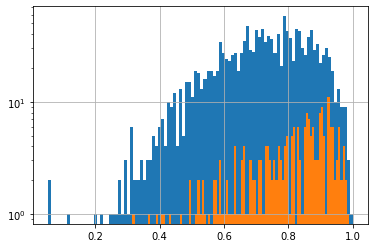

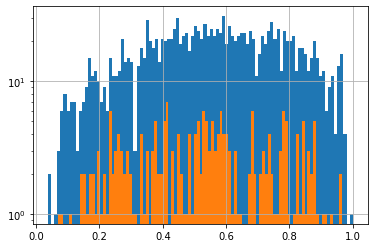

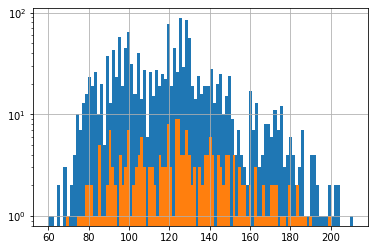

In [463]:
plt.figure()
pop_data['energy'].hist(bins = 100)
rock_data['energy'].hist(bins = 100)
plt.yscale('log')

plt.figure()
pop_data['valence'].hist(bins = 100)
rock_data['valence'].hist(bins = 100)
plt.yscale('log')

plt.figure()
pop_data['tempo'].hist(bins = 100)
rock_data['tempo'].hist(bins = 100)
plt.yscale('log')

Se puede observar que los valores para el género "pop" son menores en general que los correspondientes para el género "rock", lo cual está alineado con lo visto en los datos estadísticos.

In [440]:
energy_valence = pd.concat([pop_data[['energy', 'valence', 'genre']], rock_data[['energy', 'valence', 'genre']]])
energy_tempo = pd.concat([pop_data[['energy', 'tempo', 'genre']], rock_data[['energy', 'tempo', 'genre']]])
valence_tempo = pd.concat([pop_data[['valence', 'tempo', 'genre']], rock_data[['valence', 'tempo', 'genre']]])

Observando las diferentes relaciones entre los datos: "energy", "valence" y "tempo" usando una gráfica que permita ubicar punto a punto cada canción. De esta forma es notable la comparación de las relaciones de los datos de los géneros.

<AxesSubplot:xlabel='energy', ylabel='valence'>

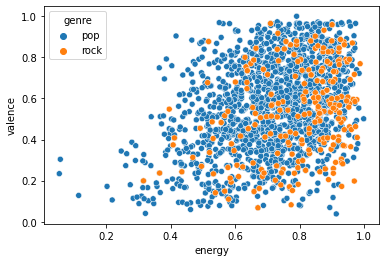

In [441]:
sns.scatterplot(x="energy", y="valence", data=energy_valence, hue="genre")

<AxesSubplot:xlabel='energy', ylabel='tempo'>

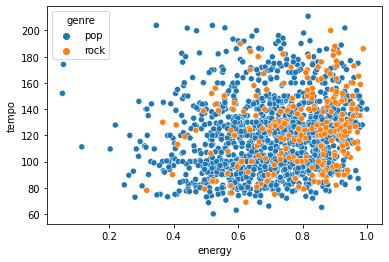

In [442]:
sns.scatterplot(x="energy", y="tempo", data=energy_tempo, hue="genre")

<AxesSubplot:xlabel='valence', ylabel='tempo'>

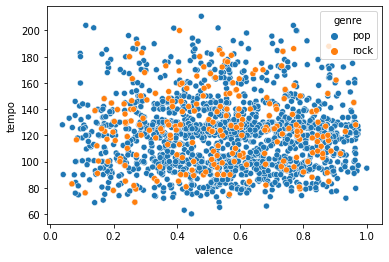

In [447]:
sns.scatterplot(x="valence", y="tempo", data=valence_tempo, hue="genre")

Finalmente, podemos gráficar la proporción de cada dato para los géneros teniendo en cuenta el promedio de cada uno de estos.

In [453]:
pop_energy_mean = pop_data['energy'].mean()
rock_energy_mean = rock_data['energy'].mean()

pop_valence_mean = pop_data['valence'].mean()
rock_valence_mean = rock_data['valence'].mean()

pop_tempo_mean = pop_data['tempo'].mean()
rock_tempo_mean = rock_data['tempo'].mean()

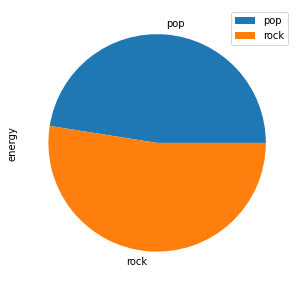

In [452]:
df = pd.DataFrame({'energy': [pop_energy_mean, rock_energy_mean]}, index=['pop', 'rock'])
plot = df.plot.pie(y='energy', figsize=(5, 5))

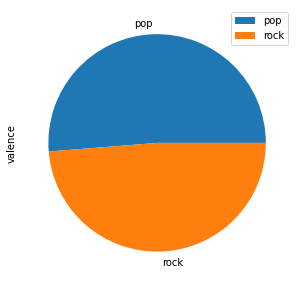

In [454]:
df = pd.DataFrame({'valence': [pop_valence_mean, rock_valence_mean]}, index=['pop', 'rock'])
plot = df.plot.pie(y='valence', figsize=(5, 5))

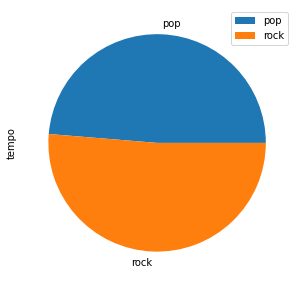

In [455]:
df = pd.DataFrame({'tempo': [pop_tempo_mean, rock_tempo_mean]}, index=['pop', 'rock'])
plot = df.plot.pie(y='tempo', figsize=(5, 5))

En general se observó que los datos para "energy", "valence" y "tempo" entre los géneros "pop" y "rock" son similares. 
De acuerdo a la descripción de cada campo del conjunto de datos, se tiene que:
* Energy: Reprecenta un amedida perceptual de intensidad y actividad.
* Valence: Describe el positivismo musical transmitido por una canción.
* Tempo: El tempo general estimado de una pista en pulsaciones por minuto (BPM).

Del análisis anterior podríamos decir para las canciones de nuestro conjunto de datos que el "rock" es un género que tiene una mayor intensidad y actividad, en comparación con el "pop". Asimismo, tiene un tempo mayor, por lo que se dice que las piezas musicales deben ejecutarse a una mayor velocidad.
Por otra parte, el género "pop" tiene un valor medio de "Valence" mayor, por lo que decimos que el positivismo transmitido por una canción del género "pop" es mayor.

### **Punto 7: Análisis de negocio**

Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra
dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

#### Pregunta de negocio:

Teniendo en cuenta que existen canciones con contenido explicito y que la música está en una continua evolución de ritmos y/o géneros, es de nuestro interés conocer cómo ha evolucionado la popularidad de este tipos de canciones a través de los años. Esta información permitiría saber si es conveniente impulsar canciones de este género, o por el contrario, considerar menos este tipo de canciones, de acuerdo a las tendencias de los usuarios.

¿Deberíamos apoyar más las canciones con contenido explicito?

In [37]:
explicit_data = data[data['explicit']==True][['popularity','year','artist']]
explicit_data

,popularity,year,artist
5,69.0,1999,Sisqo
6,86.0,2000,Eminem
19,82.0,1999,Dr. Dre
23,54.0,2000,M.O.P.
27,53.0,2000,Da Brat
...,...,...,...
1983,71.0,2019,Sech
1985,64.0,2019,Ed Sheeran
1987,69.0,2019,iann dior
1991,57.0,2020,NSG


In [41]:
artists_number = explicit_data.drop(columns={'popularity'}).groupby(by=['year']).count()
artists_number

,artist
year,
1998,1
1999,8
2000,12
2001,23
2002,28
2003,22
2004,35
2005,28
2006,26


In [42]:
explicit_popularity = explicit_data.groupby(by=['year']).mean()
explicit_popularity.reset_index(inplace=True)
explicit_popularity

,year,popularity
0,1998,49.000000
1,1999,70.500000
2,2000,66.666667
3,2001,62.217391
4,2002,65.000000
5,2003,61.363636
6,2004,61.400000
7,2005,62.107143
8,2006,54.461538
9,2007,57.863636


In [44]:
final = pd.merge(explicit_popularity, artists_number, how='outer', on='year')
final

,year,popularity,artist
0,1998,49.000000,1
1,1999,70.500000,8
2,2000,66.666667,12
3,2001,62.217391,23
4,2002,65.000000,28
5,2003,61.363636,22
6,2004,61.400000,35
7,2005,62.107143,28
8,2006,54.461538,26
9,2007,57.863636,22


Graficando la popularidad promedio y el número de artistas por cada año

<AxesSubplot:xlabel='year'>

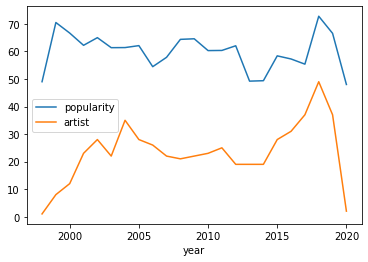

In [46]:
final.plot.line(x='year')

Teniendo en cuenta que en el primer año (1998) y en el último año (2020) se cuenta con un bajo número de canciones registradas, se decide omitir la información obtenida para dichos años.

Vemos que existe un comportamiento similar entre el número de artistas por año y el promedio de la popularidad de las canciones. Adicionalmente, se observa que en los últimos años de nuestro conjunto de datos las canciones marcadas con contenido explicito han venido incrementando su popularidad, tanto en la popularidad de cada canción como el número de artistas que generan este tipo de contenido.

De acuerdo a lo anterior, se concluye que si debería promoverse más el apoyo a este tipo de canciones desde una perspectiva de negocio, puesto que su popularidad se ha incrementado en los últimos años y esto podría traer mayores ganancias.